<IPython.core.display.Javascript object>


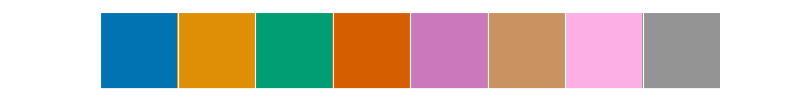

In [33]:
%matplotlib notebook
#%matplotlib inline
import pandas as pd
import numpy as np
import xarray as xr
from netCDF4 import Dataset as nc, num2date, MFDataset as mc, date2num
import os
import pytz
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

import seaborn as sns
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
sns.set_style("whitegrid")
from DataFrame import *
from datetime import datetime
from astropy.stats import LombScargle
import astropy.units as u
from scipy import signal
import matplotlib, sys
from mpl_toolkits.basemap import Basemap, cm as colmap
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [30.0,30.0]
from collections import namedtuple
timezone = pytz.timezone('Australia/Darwin')
utc = pytz.UTC
from matplotlib import animation, rc
from matplotlib.colors import LightSource
from matplotlib.colorbar import cm as colmap2
cmap = plt.cm.gist_earth
from matplotlib.patches import Polygon

import mpld3
from IPython.display import HTML
import seaborn as sns
import pytz

sns.set()
import matplotlib as mpl
fontsize = 30
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : fontsize}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = [15.0,10.0]
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=r'\makeatletter \newcommand*{\rom}[1]{\expandafter\@slowromancap\romannumeral #1@} \makeatother'
plt.style.use("seaborn-paper")

pal = sns.palplot(sns.color_palette("colorblind", 8))
sns.set_style("whitegrid", {'axes.grid':True, 'ticks':True})
sns.set_context('paper')
sns.set_palette(pal)
sns.despine()
np.warnings.filterwarnings('ignore')
utc = pytz.UTC
timezone = pytz.timezone('Australia/Darwin')
mpld3.enable_notebook()
pal
mpld3.disable_notebook()

In [ ]:
CPOL = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'CPOL', 'CPOL_TIWI_1998-2017.nc')
WOHF = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'CPOL', 'CPOL_WOH.nc')
CMORPHF = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'UM', 'CMORPH_V1_WOH.nc')
WOHFv1 = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'CPOL', 'CPOL_WOHv1.nc')
WOHFv2 = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'CPOL', 'CPOL_WOHv2.nc')
BurstF = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'CPOL', 'CPOL_burst-cmorph.pkl')
PercF = os.path.join(os.environ['HOME'],'Data','Extremes','CPOL','CPOL_TIWI_Percentiles.hdf5')
extremeTS = os.path.join(os.environ['HOME'],'Data','Extremes','CPOL','CPOL_TIWI_TS_extrme.pkl')
percf =  os.path.join(os.environ['HOME'],'Data','Extremes','CPOL', 'Periods.npz')
outdir = os.path.join(os.getenv('HOME'),'Data','Extremes','UM', 'Plot', 'Week_of_Hector')
wf = os.path.join(os.getenv('HOME'),'Data','Extremes','UM','test_w.nc')
geodataf = os.path.join(os.getenv('HOME'), 'Data', 'Extremes', 'UM')
CPOLF = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'CPOL', 'CPOL_TIWI_1998-2017-old.nc')

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
topocmap = plt.cm.gist_earth
topocmap.set_bad('w', alpha=0)
#First the greater area map
with nc(os.path.join(geodataf,'topo_2.nc')) as topof:
    Gtopo=np.ma.masked_equal(topof.variables['topo'][:],0)
    Gtopolon=topof.variables['longitude'][:]
    Gtopolat=topof.variables['latitude'][:]
#Now only the tiwi-islands manp
with nc(os.path.join(geodataf,'Topo.nc')) as topof:
    topo=np.ma.masked_equal(topof.variables['topo'][:],0)
    topolon=topof.variables['longitude'][:]
    topolat=topof.variables['latitude'][:]
with nc(CPOLF) as fnc:
    lon=fnc.variables['longitude'][:]
    lat=fnc.variables['latitude'][:]

fig = plt.figure()
ax = fig.add_subplot(111)
ls = LightSource(azdeg=315, altdeg=45)

lons=(129.7101, 132.3788)
lats=(-13.55291, -10.94487)

M = Basemap(projection='rotpole', llcrnrlat=min(Gtopolat), llcrnrlon=min(Gtopolon), urcrnrlat=max(Gtopolat), urcrnrlon=max(Gtopolon), 
            resolution='c', area_thresh=1, ax=ax, lon_0=0, o_lon_p=0., o_lat_p=90.,)

M.pcolormesh(Gtopolon, Gtopolat, ls.hillshade(Gtopo[:], vert_exag=1), cmap= topocmap, ax=ax)
#M.drawmapscale(M.boundarylons[0]-0.7, M.boundarylats[0]+0.7, max(topolon), min(topolat), 10, 
#              barstyle='fancy', fontsize=19, labelstyle='simple')
x, y = M([min(lons), min(lons), max(lons), max(lons)], [min(lats), max(lats), max(lats), min(lats)])
xy = list(zip(x,y))
ttt = plt.text(*M(min(lons)+0.1, min(lats)+0.05), 'CPOL domain', fontsize=32)
ttt.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='none'))
poly = Polygon(xy, alpha=1, edgecolor='k', lw=3, facecolor='none')
plt.gca().add_patch(poly)
#M.drawcoastlines()
M.scatter(*M(131.043101, -12.250323), marker='o',color='r', s=550)
axins = zoomed_inset_axes(ax, 7, loc=2)
axins.set_xlim(min(topolon), max(topolon))
axins.set_ylim(min(topolat), max(topolat))
tmap = Basemap(projection='cyl',llcrnrlat=min(lat), llcrnrlon=min(lon), urcrnrlat=max(lat), urcrnrlon=max(lon), 
               resolution='c',  area_thresh=1, ax=axins)
tmap.pcolormesh(topolon, topolat, ls.hillshade(topo[:], vert_exag=1), cmap= topocmap)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec='k')
plt.annotate('a)', xy=(0.01 ,0.95), xycoords='axes fraction', fontsize=32)
lons, lats = [min(Gtopolon), max(Gtopolon)], [min(Gtopolat), max(Gtopolat)]
axins2 = inset_axes(ax, width='25%', height='25%', loc=3)
Worldmap= Basemap(projection='ortho', lat_0=Gtopolat[int(len(Gtopolat)/2)], lon_0=Gtopolon[int(len(Gtopolon)/2)],
                 ax=axins2, height=240*10**3)
Worldmap.drawcoastlines(color='white')
Worldmap.fillcontinents(color='gray')
bx, by = Worldmap(M.boundarylons, M.boundarylats)
xy = list(zip(bx,by))
poly = Polygon(xy, alpha=1, edgecolor='none', lw=0, facecolor='darkcyan')
Worldmap.ax.add_patch(poly)
fig.savefig(os.path.join(os.environ['HOME'], 'Todds_Topo.png'), bbox_inches='tight', format='png', dpi=300)

In [2]:
CPOLF='/home/unimelb.edu.au/mbergemann/Data/CPOL/netcdf/CPOL_Feb_2006.nc'
import xarray

In [ ]:
f=xarray.open_dataset(CPOLF)

In [ ]:
p = f['radar_estimated_rain_rate']/6

In [ ]:
precip = p.groupby('time.day').sum(dim='time').mean(dim='day')

In [ ]:
m = Basemap(llcrnrlat=min(precip.coords['latitude']), llcrnrlon=min(precip.coords['longitude']),
            urcrnrlat=max(precip.coords['latitude']), urcrnrlon=max(precip.coords['longitude']), 
            resolution='f', area_thresh=1)

In [ ]:
from palettable.mycarta import LinearL_20, CubeYF_20
from palettable.colorbrewer.qualitative import Paired_12
from palettable.colorbrewer.sequential import Blues_9

In [ ]:
cmap = Blues_9.get_mpl_colormap(N=20)
cmap.set_under('w')
cmap.set_bad('w')
fig2 = plt.figure(figsize=(12,12))
ax = fig2.add_subplot(111)
im = m.pcolormesh(precip.coords['longitude'], precip.coords['latitude'], precip, cmap=cmap, vmin=2, vmax=19)
coast=m.drawcoastlines(linewidth=1)
cbar = m.colorbar(im, location='right', pad=0.1, size=0.2)
cbar.set_label('Radar estimated rain-rate [mm/d]', fontsize=20)
cbar.ax.tick_params(labelsize=16)
fig2.savefig(os.path.join(os.environ['HOME'], 'Todds_Rainfall.pdf'), bbox_inches='tight', format='pdf', dpi=300)

In [7]:
from math import sin, cos, sqrt, atan2, radians
def dist_km(p1, p2):
    ## approximate radius of earth in km
    R = 6373.0
    
    lat1 = radians(p1[0])
    lon1 = radians(p1[1])
    lat2 = radians(p2[0])
    lon2 = radians(p2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = atan2(sqrt(a), sqrt(1 - a))
    return  R * c
def dist_rad(p)

In [ ]:
dist((min(precip.coords['latitude']),min(precip.coords['longitude'])),
        (min(precip.coords['latitude']),max(precip.coords['longitude'])))

In [ ]:
with nc(CPOLF) as fnc:
    lon=fnc.variables['longitude'][:]
    lat=fnc.variables['latitude'][:]

In [ ]:
dist((min(lat),min(lon)), (min(lat),max(lon)))

In [44]:
cpol_mask =xarray.open_dataset(os.path.join(os.environ['HOME'], 'mask_cpol_var_ana.nc'),
                              decode_times=False)
ecmwf_mask =xarray.open_dataset(os.path.join(os.environ['HOME'], 'mask_ecmwf_var_ana.nc'),
                              decode_times=False)

In [282]:
m = Basemap(llcrnrlat=-13.6, 
            llcrnrlon=129.7,
            urcrnrlat=-10.9,
            urcrnrlon=132.4,
            resolution='f',
            area_thresh=1)

<IPython.core.display.Javascript object>


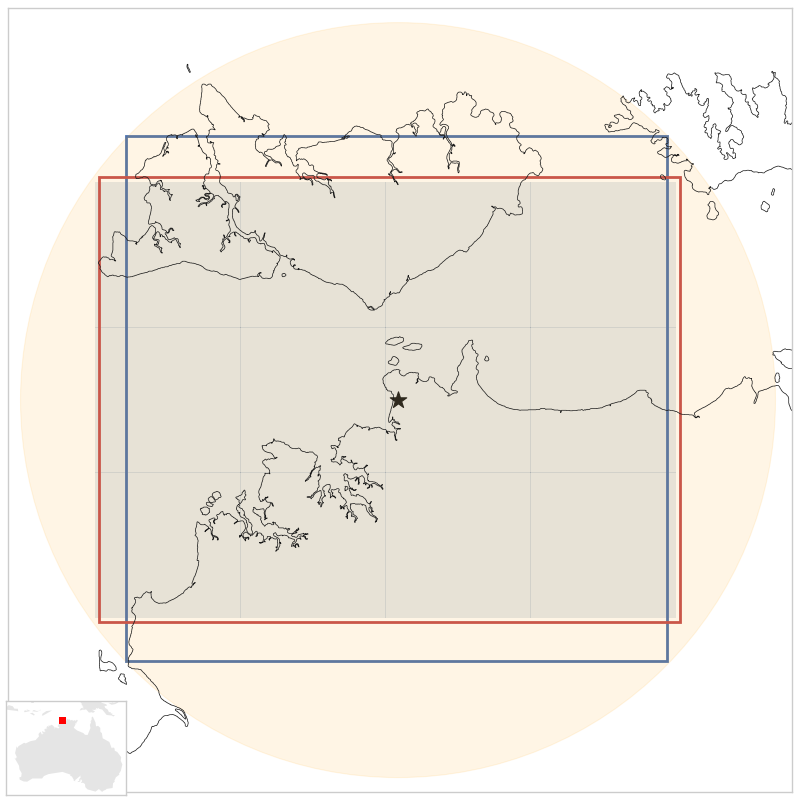

In [360]:
%matplotlib notebook
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
mpld3.enable_notebook()
radar_loc = m(131.043101, -12.250323)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cpol_x1, cpol_x2 = 130.106, 131.968 
cpol_y1, cpol_y2 = -12.93-.22, -11.34
cpol_mx, cpol_my = m([cpol_x1, cpol_x1, cpol_x2, cpol_x2], [cpol_y1, cpol_y2, cpol_y2, cpol_y1])
cpol_patch = list(zip(cpol_mx, cpol_my))
ecmwf_x1, ecmwf_x2 = 129.915+0.1, 131.916+0.1
ecmwf_y1, ecmwf_y2 = -12.843-.17, -11.313-0.17
ecmwf_mx, ecmwf_my= m([ecmwf_x1, ecmwf_x1, ecmwf_x2, ecmwf_x2], [ecmwf_y1, ecmwf_y2, ecmwf_y2, ecmwf_y1])
ecmwf_patch = list(zip(ecmwf_mx, ecmwf_my))
circle = plt.Circle(radar_loc, 1.3, color='orange', alpha=0.1)
cpol_poly = Polygon(cpol_patch, alpha=1, edgecolor='b', lw=2, facecolor='none')
ecmwf_poly = Polygon(ecmwf_patch, alpha=1, edgecolor='r', lw=2, facecolor='none')
ax.add_patch(cpol_poly)
ax.add_patch(ecmwf_poly)
ax.add_artist(circle)
m.scatter(*radar_loc, marker='*',color='k', s=155, alpha=1)
#im = m.pcolormesh(cpol_mask.j, cpol_mask.i, cpol_mask.rain_rate, alpha=0.1, cmap=mpl.cm.Greens_r)
im = m.pcolormesh(ecmwf_mask.longitude, ecmwf_mask.latitude, ecmwf_mask_ary, alpha=0.1, cmap=mpl.cm.Blues_r)
_= m.drawcoastlines(linewidth=0.5)
axins2 = inset_axes(ax, width='20%', height='20%', loc=3, borderpad=0, bbox_to_anchor=(6,-8,600,600))
Worldmap= Basemap(llcrnrlat=-40, llcrnrlon=110, urcrnrlat=-5, urcrnrlon=155,
                 ax=axins2, height=1)
#Worldmap.drawcoastlines(color='k', linewidth=0.1)
Worldmap.fillcontinents(color='gray', alpha=0.2)
bx, by = Worldmap(m.boundarylons, m.boundarylats)
xy = list(zip(bx,by))
poly = Polygon(xy, alpha=1, edgecolor='none', lw=0, facecolor='red')
Worldmap.ax.add_patch(poly)
fig.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99, wspace=0, hspace=0)
fig.savefig(os.path.expanduser('~/VA_setup.pdf'), dpi=300, bbox_inches='tight')

In [45]:
ecmwf_mask_ary = np.ma.masked_less(ecmwf_mask.masking_var, 0) + 1

In [96]:
np.argmax(ecmwf_mask_ary, axis=0)

array([0, 2, 2, 2, 2, 0, 0])

In [298]:
inset_axes?